In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clustering Models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import silhouette_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


#### Load Dataset

In [2]:
df = pd.read_excel("marketing_campaign1 (1).xlsx")

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Basic Info:

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


### Handleing Missing Values :

In [4]:
# Check missing values
df.isnull().sum()

# Fill missing Income with median
df['Income'].fillna(df['Income'].median(), inplace=True)

### Convert Date Column :

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### Feature Engineering :

In [6]:
# Age
df['Age'] = 2025 - df['Year_Birth']

# Total Children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Total Spending
df['Total_Spending'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)

# Total Purchases
df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

# Customer Duration
df['Customer_For'] = (pd.Timestamp("today") - df['Dt_Customer']).dt.days

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Total_Purchases,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,68,0,1617,22,4911
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,71,2,27,4,4361
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,60,0,776,20,4560
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,41,1,53,6,4387
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,44,1,422,14,4409


### Droping Unnecessary Columns :

In [7]:
df.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'Year_Birth'], axis=1, inplace=True)

### Selecting Features for Clustering:

In [8]:
features = df[[
    'Age',
    'Income',
    'Recency',
    'Total_Spending',
    'Total_Purchases',
    'Total_Children',
    'NumWebVisitsMonth'
]]

features.head()

,Age,Income,Recency,Total_Spending,Total_Purchases,Total_Children,NumWebVisitsMonth
0,68,58138.0,58,1617,22,0,7
1,71,46344.0,38,27,4,2,5
2,60,71613.0,26,776,20,0,4
3,41,26646.0,26,53,6,1,6
4,44,58293.0,94,422,14,1,5


### Scaling :

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

### Elbow Method (For KMeans) :

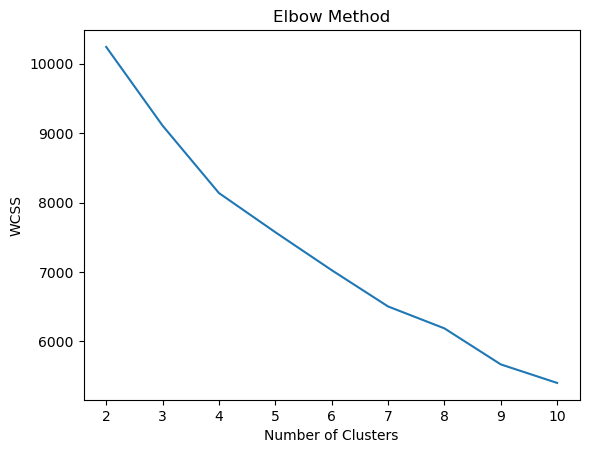

In [15]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Model 1: KMeans :

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

kmeans_score = silhouette_score(scaled_data, kmeans_labels)

print("KMeans Silhouette Score:", kmeans_score)

KMeans Silhouette Score: 0.19335321830160584


### Model 2: Hierarchical Clustering :

In [17]:
hier = AgglomerativeClustering(n_clusters=4)
hier_labels = hier.fit_predict(scaled_data)

hier_score = silhouette_score(scaled_data, hier_labels)

print("Hierarchical Silhouette Score:", hier_score)

Hierarchical Silhouette Score: 0.1759742884494404


### Model 3: DBSCAN

In [30]:
dbscan = DBSCAN(eps=1.32, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)

# Count unique clusters (excluding noise)
unique_labels = set(db_labels)
unique_labels.discard(-1)

if len(unique_labels) > 1:
    mask = db_labels != -1
    db_score = silhouette_score(scaled_data[mask], db_labels[mask])
    print("DBSCAN Silhouette Score:", db_score)
else:
    print("DBSCAN did not form enough clusters for silhouette score.")


DBSCAN Silhouette Score: 0.08079058364249328


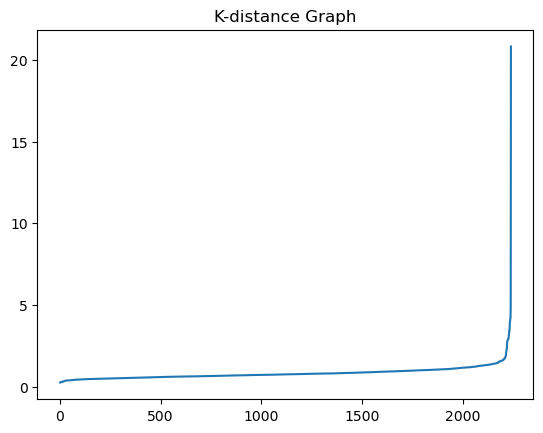

In [31]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("K-distance Graph")
plt.show()

### Model 4: Gaussian Mixture Model :

In [32]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

gmm_score = silhouette_score(scaled_data, gmm_labels)

print("GMM Silhouette Score:", gmm_score)

GMM Silhouette Score: 0.17127021585956884


### Compare Models:

In [34]:
print("KMeans:", kmeans_score)
print("Hierarchical:", hier_score)
print("DBSCAN:", db_score)
print("GMM:", gmm_score)

KMeans: 0.19335321830160584
Hierarchical: 0.1759742884494404
DBSCAN: 0.08079058364249328
GMM: 0.17127021585956884


### Final Model(KMeans):

In [35]:
df['Cluster'] = kmeans_labels

### Cluster Analysis :

In [ ]:
df.groupby('Cluster')[[
    'Income',
    'Total_Spending',
    'Total_Purchases',
    'Recency'
]].mean()

### PCA for Visualization :

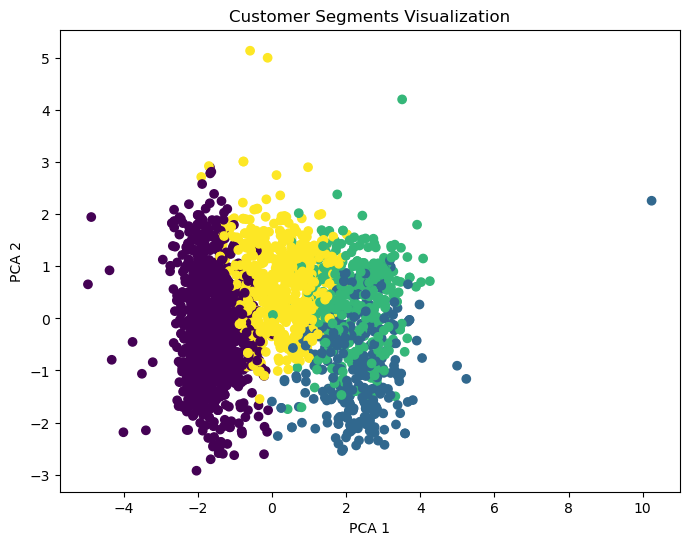

In [36]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='viridis')
plt.title("Customer Segments Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### Save Best Model:

In [37]:
import pickle

pickle.dump(kmeans, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
